In [68]:
import numpy as np
import pandas as pd
import scipy as sp

In [69]:
df = pd.read_excel(r"C:\Users\adevr\MITx_6.419x\vol_model_zeynep\vol_data_close.xlsx")
df = df.iloc[::-1]
df = df.set_index("date")

df["log_return"] = np.log(df["close"] / df["close"].shift(1))
df["log_return"] = df["log_return"].fillna(0)
df["log_return_sq"] = df["log_return"]**2
# df = df.dropna()

df

,close,var,log_return,log_return_sq
date,,,,
2023-07-21,26.93720,0.000021,0.000000,0.000000e+00
2023-07-24,26.95300,NaN,0.000586,3.438386e-07
2023-07-25,26.92810,NaN,-0.000924,8.542517e-07
2023-07-26,26.94475,NaN,0.000618,3.820750e-07
2023-07-27,26.94540,NaN,0.000024,5.819262e-10
...,...,...,...,...
2024-07-16,33.08615,NaN,0.001287,1.656020e-06
2024-07-17,33.09380,NaN,0.000231,5.344782e-08
2024-07-18,33.06975,NaN,-0.000727,5.285092e-07


In [70]:
df["var"].shape[0]

251

In [71]:
alpha = 0.2

for i in range(1, df["var"].shape[0]):
    df["var"].iloc[i] = alpha * df["log_return_sq"].iloc[i-1] + (1 - alpha) * df["var"].iloc[i-1]
    
df.iloc[:100, :]

C:\Users\adevr\AppData\Local\Temp\ipykernel_19564\1719226345.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["var"].iloc[i] = alpha * df["log_return_sq"].iloc[i-1] + (1 - alpha) * df["var"].iloc[i-1]
C:\Users\adevr\AppData\Local\Temp\

,close,var,log_return,log_return_sq
date,,,,
2023-07-21,26.93720,2.149587e-05,0.000000,0.000000e+00
2023-07-24,26.95300,1.719669e-05,0.000586,3.438386e-07
2023-07-25,26.92810,1.382612e-05,-0.000924,8.542517e-07
2023-07-26,26.94475,1.123175e-05,0.000618,3.820750e-07
2023-07-27,26.94540,9.061814e-06,0.000024,5.819262e-10
...,...,...,...,...
2023-12-04,28.90105,2.020625e-06,-0.000655,4.296418e-07
2023-12-05,28.92350,1.702429e-06,0.000776,6.029318e-07
2023-12-06,28.92450,1.482529e-06,0.000035,1.195318e-09


In [72]:
def log_likelihood(x, var, mu=0):  # vectorized
    return -0.5 * np.log(2*np.pi*var) - 0.5 * (x - mu)**2 / var

def negative_log_likelihood(x, var, mu=0):
    return -(-0.5 * np.log(2*np.pi*var) - 0.5 * (x - mu)**2 / var)

def sum_negative_log_likelihood(x_arr, var_arr, mu=0):
    return -(-0.5 * np.log(2*np.pi*x_arr) - 0.5 * (x - mu)**2 / var_arr).sum()

type(log_likelihood)

function

In [73]:
pd.Series([1, 1, 1]).shift(1)

0    NaN
1    1.0
2    1.0
dtype: float64

In [74]:
def calc_gradient(x_arr, var_arr, mu=0):
    dl_dsigma2 = -0.5 * 1/var_arr + 0.5 * (x_arr - mu)**2 / var_arr
    dsigma2_dalpha = (x_arr.shift(1))**2 - var_arr.shift(1)
    return (dl_dsigma2 * dsigma2_dalpha).mean()

In [75]:
calc_gradient(df["log_return"], df["var"])

0.17963222845604163

Optimal alpha: 0.2


C:\Users\adevr\AppData\Local\Temp\ipykernel_19564\2756919004.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  var_arr[i] = alpha * x_arr[i-1]**2 + (1 - alpha) * var_arr[i-1]
C:\Users\adevr\AppData\Local\Temp\ipykernel_19564\2756919004.py:16: RuntimeWarning: divide by zero encountered in log
  return -(-0.5 * np.log(2 * np.pi * var) - 0.5 * (x - mu)**2 / var)
C:\Users\adevr\AppData\Local\Temp\ipykernel_19564\2756919004.py:16: RuntimeWarning: divide by zero encountered in divide
  return -(-0.5 * np.log(2 * np.pi * var) - 0.5 * (x - mu)**2 / var)
C:\Users\adevr\AppData\Local\Temp\ipykernel_19564\2756919004.py:16: RuntimeWarning: invalid value encountered in subtract
  return -(-0.5 * np.log(2 * np.pi * var) - 0.5 * (x - mu)**2 / var)


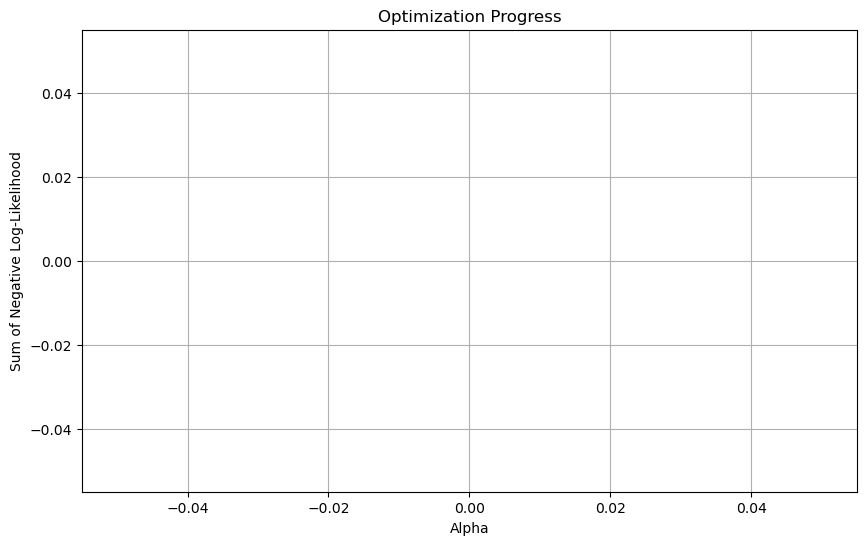

In [76]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Load and prepare data
df = pd.read_excel(r'C:\Users\adevr\MITx_6.419x\vol_model_zeynep\vol_data_close.xlsx')
df = df.iloc[::-1]
df = df.set_index("date")
df["log_return"] = np.log(df["close"] / df["close"].shift(1))
df["log_return"] = df["log_return"].fillna(0)
df["log_return_sq"] = df["log_return"]**2

# Define the negative log-likelihood function
def negative_log_likelihood(x, var, mu=0):
    return -(-0.5 * np.log(2 * np.pi * var) - 0.5 * (x - mu)**2 / var)

# Define the objective function to minimize
def sum_negative_log_likelihood(alpha, x_arr, initial_var):
    var_arr = np.zeros_like(x_arr)
    var_arr[0] = initial_var
    for i in range(1, len(x_arr)):
        var_arr[i] = alpha * x_arr[i-1]**2 + (1 - alpha) * var_arr[i-1]
    
    nll_sum = np.sum(negative_log_likelihood(x_arr, var_arr))
    return nll_sum

# Variables to store the progress of optimization
alpha_values = []
nll_values = []

# Callback function to store alpha and NLL values
def callback(alpha):
    alpha_values.append(alpha[0])
    nll = sum_negative_log_likelihood(alpha, df["log_return"].values, initial_var)
    nll_values.append(nll)
    print(f"Alpha: {alpha[0]}, NLL: {nll}")

# Initial variance (you can choose a small number, e.g., 1e-6)
initial_var = 1e-6

# Minimize the objective function with respect to alpha
result = minimize(sum_negative_log_likelihood, x0=0.2, args=(df["log_return"].values, initial_var), bounds=[(0, 1)], callback=callback)
optimal_alpha = result.x[0]

print(f"Optimal alpha: {optimal_alpha}")

# Plot the alpha values and corresponding NLL values
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, nll_values, marker='o', linestyle='-')
plt.xlabel('Alpha')
plt.ylabel('Sum of Negative Log-Likelihood')
plt.title('Optimization Progress')
plt.grid(True)
plt.show()
